In [1]:
import sys
import os
import cv2 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import collections
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
import pickle
%matplotlib inline
pd.options.display.max_rows = 500

In [23]:
os.chdir(r'C:\Users\torej\Downloads\FASE1\FASE1')
traindf = pd.read_excel('TRAIN.xlsx')
valdf = pd.read_excel('VAL.xlsx')
os.chdir(r'C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2')
filenames = os.listdir()
currdir = os.getcwd()
currdir = currdir+'\\'
#filenames.index('dataset.xlsx')
filenames_model = [currdir+element for element in filenames]
os.chdir(r'C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VALID2')
filenames = os.listdir()
currdir = os.getcwd()
currdir = currdir+'\\'
#filenames.index('dataset.xlsx')
filenames_valid = [currdir+element for element in filenames]


In [54]:
traindf['Filename'] = traindf['NOMBRE'].apply(lambda x: x.split('.')[0])
traindf

,ENUMERACION,NOMBRE,CLASE,Filename
0,1,c1anemia-381.jpg,0,c1anemia-381
1,2,c1anemia-385.jpg,0,c1anemia-385
2,3,c1anemia-391.jpg,0,c1anemia-391
3,4,c1anemia-392.jpg,1,c1anemia-392
4,5,c1anemia-394.jpg,1,c1anemia-394
5,6,c1anemia-395.jpg,1,c1anemia-395
6,7,c1anemia-396.jpg,0,c1anemia-396
7,8,c1anemia-397.jpg,1,c1anemia-397
8,9,c1anemia-398.jpg,0,c1anemia-398
9,10,c1anemia-400.jpg,0,c1anemia-400


In [60]:
valdf['Filename'] =valdf['nombre'].apply(lambda x: x.split('.')[0])
valdf

,enumeracion,nombre,clase,Filename
0,1,c1anemia-59.jpg,0,c1anemia-59
1,2,c1anemia-98.jpg,0,c1anemia-98
2,3,c1anemia-104.jpg,0,c1anemia-104
3,4,c1anemia-107.jpg,0,c1anemia-107
4,5,c1anemia-108.jpg,0,c1anemia-108
5,6,c1anemia-110.jpg,1,c1anemia-110
6,7,c1anemia-114.jpg,1,c1anemia-114
7,8,c1anemia-116.jpg,0,c1anemia-116
8,9,c1anemia-118.jpg,1,c1anemia-118
9,10,c1anemia-119.jpg,0,c1anemia-119


In [50]:
dataframe_model = pd.DataFrame(filenames_model, columns=['File'])
dataframe_model['Filename'] = dataframe_model['File'].apply(lambda x: x.split('\\')[-1]).apply(lambda x: x.split('_j')[0])
dataframe_model

,File,Filename
0,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-381
1,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-385
2,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-391
3,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-392
4,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-392
5,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-392
6,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-394
7,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-394
8,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-394
9,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-394


In [80]:
dataframe_valid = pd.DataFrame(filenames_valid, columns=['File'])
dataframe_valid['Filename'] = dataframe_valid['File'].apply(lambda x: x.split('\\')[-1]).apply(lambda x: x.split('_j')[0])
dataframe_valid

,File,Filename
0,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-104
1,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-107
2,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-108
3,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-110
4,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-114
5,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-116
6,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-118
7,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-119
8,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-124
9,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-125


In [70]:
valdf['Filename']

0      c1anemia-59
1      c1anemia-98
2     c1anemia-104
3     c1anemia-107
4     c1anemia-108
5     c1anemia-110
6     c1anemia-114
7     c1anemia-116
8     c1anemia-118
9     c1anemia-119
10    c1anemia-124
11    c1anemia-125
12    c1anemia-127
13    c1anemia-128
14    c1anemia-129
15    c1anemia-131
16    c1anemia-132
17    c1anemia-134
18    c1anemia-136
19    c1anemia-140
20    c1anemia-151
21    c1anemia-155
22    c1anemia-159
23    c1anemia-160
24    c1anemia-163
25    c1anemia-164
26    c1anemia-169
27    c1anemia-171
28    c1anemia-173
29    c1anemia-174
30    c1anemia-175
31    c1anemia-177
32    c1anemia-182
33    c1anemia-189
34    c1anemia-197
35    c1anemia-198
36    c1anemia-199
37    c1anemia-200
38    c1anemia-203
39    c1anemia-206
40    c1anemia-207
41    c1anemia-209
42    c1anemia-210
43    c1anemia-212
44    c1anemia-213
45    c1anemia-214
46    c1anemia-215
47    c1anemia-216
48    c1anemia-217
49    c1anemia-218
50    c1anemia-221
51    c1anemia-223
52    c1anem

In [82]:
df_model = pd.merge(dataframe_model,traindf)
df_model

,File,Filename,ENUMERACION,NOMBRE,CLASE
0,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-381,1,c1anemia-381.jpg,0
1,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-385,2,c1anemia-385.jpg,0
2,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-391,3,c1anemia-391.jpg,0
3,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-392,4,c1anemia-392.jpg,1
4,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-392,4,c1anemia-392.jpg,1
5,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-392,4,c1anemia-392.jpg,1
6,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-394,5,c1anemia-394.jpg,1
7,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-394,5,c1anemia-394.jpg,1
8,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-394,5,c1anemia-394.jpg,1
9,C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\I...,c1anemia-394,5,c1anemia-394.jpg,1


In [81]:
df_val = pd.merge(dataframe_valid,valdf, on='Filename')
#dataframe_valid['Filename']
#dataframe_valid['File'][0]
df_val

,File,Filename,enumeracion,nombre,clase
0,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-104,3,c1anemia-104.jpg,0
1,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-107,4,c1anemia-107.jpg,0
2,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-108,5,c1anemia-108.jpg,0
3,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-110,6,c1anemia-110.jpg,1
4,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-114,7,c1anemia-114.jpg,1
5,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-116,8,c1anemia-116.jpg,0
6,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-118,9,c1anemia-118.jpg,1
7,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-119,10,c1anemia-119.jpg,0
8,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-124,11,c1anemia-124.jpg,1
9,C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VA...,c1anemia-125,12,c1anemia-125.jpg,0


In [8]:
image = cv2.imread('c1anemia-396.jpg')
r,b,g = cv2.split(image)
meanR = r.sum()/np.count_nonzero(r)
meanG = g.sum()/np.count_nonzero(g)
#print(r.sum()/np.count_nonzero(r), g.sum()/np.count_nonzero(g), b.sum()/np.count_nonzero(b))
print( 'mean of Red ', meanR)
print( 'mean of Green ', meanG)
print('Coeficient: ',np.log10(meanR)-np.log10(meanG))
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print("gris media: ", gray.sum() / np.count_nonzero(gray))
plt.imshow(b, cmap='gray', vmin=0, vmax=255);
h_1 = cv2.calcHist([gray], [0], None, [256], [0, 255])
# Eliminar zonas negras
h_1[0][0] = 0
#print(sum(h_1))
# Normalizar
h_1 = h_1 / sum(h_1)


# Vector con niveles de gris normalizado
gris = np.arange(256) / 255
h_11 = np.zeros(256)
moments = np.zeros(6)
for i in range(256):
    h_11[i] = h_1[i][0]

moments[0] = sum(h_11 * gris)

for j in range(1, 6):
    moments[j] = sum(((gris - moments[0]) ** (j + 1)) * h_11)

moments = moments * 256
moments[1] = (moments[1] * 256) ** (0.5)
R = 1 - (1 / (1 + (moments[2] / (256))))
print('Intensidad promedio =',moments[0])
print('Desviación estándar =',moments[1])
print('Suavidad =',R)
print('Asimetría =',moments[3])
print('Uniformidad =',moments[4])
print('Entropía =',moments[5])

ValueError: not enough values to unpack (expected 3, got 0)

In [9]:
df

,File,Filename,Anemia
0,c1anemia-108.jpg,c1anemia-108,Sin Anemia
1,c1anemia-111.jpg,c1anemia-111,Anemia
2,c1anemia-112.jpg,c1anemia-112,Anemia
3,c1anemia-121.jpg,c1anemia-121,Anemia
4,c1anemia-122.jpg,c1anemia-122,Sin Anemia
5,c1anemia-136.jpg,c1anemia-136,Sin Anemia
6,c1anemia-155.jpg,c1anemia-155,Sin Anemia
7,c1anemia-156.jpg,c1anemia-156,Sin Anemia
8,c1anemia-160.jpg,c1anemia-160,Sin Anemia
9,c1anemia-171.jpg,c1anemia-171,Sin Anemia


In [144]:
eritemia = []
means = []
grays = []
stdev = []
softness = []
asimetria = []
uniformi = []
entropy = []
for index, file in enumerate(df_model['File']):
    print('read the file: ',file)
    image = cv2.imread(file)
    r,g,b = cv2.split(image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    meanR = r.sum()/np.count_nonzero(r)
    meanG = g.sum()/np.count_nonzero(g)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    grays.append(gray.sum() / np.count_nonzero(gray))
    #print("gris media: ", gray.sum() / np.count_nonzero(gray))
    eritemia.append(np.log10(meanR)-np.log10(meanG))
    #plt.imshow(b, cmap='gray', vmin=0, vmax=255);
    h_1 = cv2.calcHist([gray], [0], None, [256], [0, 255])
    # Eliminar zonas negras
    h_1[0][0] = 0
    #print(sum(h_1))
    # Normalizar
    h_1 = h_1 / sum(h_1)
    # Vector con niveles de gris normalizado
    gris = np.arange(256) / 255
    h_11 = np.zeros(256)
    moments = np.zeros(6)
    for i in range(256):
        h_11[i] = h_1[i][0]

    moments[0] = sum(h_11 * gris)

    for j in range(1, 6):
        moments[j] = sum(((gris - moments[0]) ** (j + 1)) * h_11)

    moments = moments * 256
    moments[1] = (moments[1] * 256) ** (0.5)
    R = 1 - (1 / (1 + (moments[2] / (256))))
    means.append(moments[0])
    stdev.append(moments[1])
    softness.append(R)
    asimetria.append(moments[3])
    uniformi.append(moments[4])
    entropy.append(moments[5])
    #print('Intensidad promedio =',moments[0])
    #print('Desviación estándar =',moments[1])
    #print('Suavidad =',R)
    #print('Asimetría =',moments[3])
    #print('Uniformidad =',moments[4])
    #print('Entropía =',moments[5])

df_model['Eritemia'] = eritemia
df_model['means'] = means
df_model['meansJJ'] = grays
df_model['Eritemia'] = eritemia
df_model['means'] = means
df_model['meansJJ'] = grays
df_model['stdev'] = stdev
df_model['softness'] = softness
df_model['asimetria'] = asimetria
df_model['uniformi'] = uniformi
df_model['entropy'] = entropy

read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-381_jpg.rf.8d73da50496b2d8759e583071c99dec3.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-385_jpg.rf.dcdac715bfe3b0ba1422aed5bc3266c3.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-391_jpg.rf.4a2318c659b965472eb9190705f2565d.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-392_jpg.rf.885c98e6325fcb8f1e749fcd696d96cf.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-392_jpg.rf.88beb9746393f06d1d240ab53bd9886a.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-392_jpg.rf.8bc09516e6075c2697019a831093f28e.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-394_jpg.rf.38011da481dfb937dc013415c7cd0123.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-394_jpg.rf.49af906790559c9a4faabf20208a4

<ipython-input-144-7544b1892378>:14: RuntimeWarning: invalid value encountered in true_divide
  meanR = r.sum()/np.count_nonzero(r)
<ipython-input-144-7544b1892378>:15: RuntimeWarning: invalid value encountered in true_divide
  meanG = g.sum()/np.count_nonzero(g)
<ipython-input-144-7544b1892378>:17: RuntimeWarning: invalid value encountered in true_divide
  grays.append(gray.sum() / np.count_nonzero(gray))
<ipython-input-144-7544b1892378>:26: RuntimeWarning: invalid value encountered in true_divide
  h_1 = h_1 / sum(h_1)


read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-408_jpg.rf.e25207238b83b99c10bf731f4ce8c7ce.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-410_jpg.rf.18d3af26ff228c4bbc5c545e257bf072.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-410_jpg.rf.33826e7ac639a935299c8433dbb9d275.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-410_jpg.rf.3aa9071848f7253b1e8e0a197011ad49.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-410_jpg.rf.70dd9235f3520006a43114bde1c2c05c.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-410_jpg.rf.8a313f1413218f0abe87d75dcce40c98.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-410_jpg.rf.ab19864efe35c363d4b4a495d551b7c5.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-410_jpg.rf.ed1d591a0fd45a081658fecda824b

read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-535_jpg.rf.20bdb2d0cc8c4d6a45ff160467188a7b.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-537_jpg.rf.02de577d9c53b0fba43c3b16328a458b.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-537_jpg.rf.128050f364109c08f907d47d48ec45a5.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-537_jpg.rf.89fafa03b07d1b4ba43fc5778ab623d2.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-537_jpg.rf.a85c6321f29747d620dd29f0e7434932.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-537_jpg.rf.b2afbb100b831efac5c21a550f5890f0.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-538_jpg.rf.668ecef5744a08ddc7b630e57539eb04.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-539_jpg.rf.bc1263db658a93b12d116b9325167

read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-644_jpg.rf.1cf6094eabb511db550bd272e04e9382.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-647_jpg.rf.e0ad7f9c9886f6a0a15631ecf4e2bb3a.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-649_jpg.rf.fc0374979b11767aa2b856025802c889.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-651_jpg.rf.6a448b7d15c9a29788634a67edf74e2e.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-652_jpg.rf.71725bc116dcc45f7685317340c9b664.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-656_jpg.rf.e143e09c2d379ea14d841fca3dd039b9.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-657_jpg.rf.295c8f722219fa1ac8bf566e48eb1b14.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c1anemia-658_jpg.rf.4d4c73ae29edd526201e0a88012f0

read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-1054_jpg.rf.3c19008982377768feb001c3e0ab5d16.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-1055_jpg.rf.f417611871ea59506d0b1a002b298a71.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-1056_jpg.rf.b40bee66060c546004e9daa1f87c529e.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-1059_jpg.rf.90287736e47e81060be31976ec002ed0.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-1060_jpg.rf.f77c24152a185c9fa5e00fa414aee06c.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-1061_jpg.rf.e8dcb8169a8d5f865c9299ec41fbac47.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-1062_jpg.rf.3adedacaec4aaa0fdc07192cd79af520.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-1063_jpg.rf.4f7b5e7c1ec225417054d

read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-946_jpg.rf.704f32cc00d1049afe3e45221085d94b.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-947_jpg.rf.8537e9ad20fc5a719ea9251967fd054f.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-949_jpg.rf.8b92914fc7da4fb02011786e1634e557.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-950_jpg.rf.215271a315093e06da751044893a2f3e.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-954_jpg.rf.14894494aca8596f49e4dd906cdda191.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-955_jpg.rf.63ea1cf08ef36693eb9528f7df6409f4.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-959_jpg.rf.e5eedc14511eb743051c6ed2b99a8dc5.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\c2anemia-960_jpg.rf.605f9f8b8cc5e07240ebbb0bb2968

read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-710_jpg.rf.640e2c05aea04f210411d4e56f28fd0d.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-713_jpg.rf.740ce9ab7c7406c653f09f080f23b529.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-713_jpg.rf.9032e2012154f68cf632cd7debcbde54.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-713_jpg.rf.e0715d6139edcc23173e74e027da5d48.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-713_jpg.rf.fc883b9b319c825f8b6682fac4f2bc65.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-715_jpg.rf.18f8461774e20908c619262eb7894dba.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-715_jpg.rf.2d02c4bf85caa56e71d87f115e856f1c.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-715_jpg.rf.b57f1a17e2212dae505ba1aa46d14539.jpg


read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-757_jpg.rf.999617394661f489cece880d3a0ac347.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-760_jpg.rf.65648b471890ad622411d246204e5528.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-761_jpg.rf.4142bb03d954ffb864ded0a3908dc18c.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-762_jpg.rf.79a698cf6f05227e7c5c961e26b4816a.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-767_jpg.rf.641c164e2ec732fe403b4af35b32befb.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-768_jpg.rf.2e22f0c8c95944615e27e2c55bc77184.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-769_jpg.rf.c858598657288792dc70e65899d654da.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\IMAGES2\IMAGES2\no_vars-770_jpg.rf.222091bdb97263df928a2e65e05f3f6c.jpg


In [145]:
eritemia = []
means = []
grays = []
stdev = []
softness = []
asimetria = []
uniformi = []
entropy = []

for index, file in enumerate(df_val['File']):
    print('read the file: ',file)
    image = cv2.imread(file)
    r,g,b = cv2.split(image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    meanR = r.sum()/np.count_nonzero(r)
    meanG = g.sum()/np.count_nonzero(g)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    grays.append(gray.sum() / np.count_nonzero(gray))
    #print("gris media: ", gray.sum() / np.count_nonzero(gray))
    eritemia.append(np.log10(meanR)-np.log10(meanG))
    #plt.imshow(b, cmap='gray', vmin=0, vmax=255);
    h_1 = cv2.calcHist([gray], [0], None, [256], [0, 255])
    # Eliminar zonas negras
    h_1[0][0] = 0
    #print(sum(h_1))
    # Normalizar
    h_1 = h_1 / sum(h_1)
    # Vector con niveles de gris normalizado
    gris = np.arange(256) / 255
    h_11 = np.zeros(256)
    moments = np.zeros(6)
    for i in range(256):
        h_11[i] = h_1[i][0]

    moments[0] = sum(h_11 * gris)

    for j in range(1, 6):
        moments[j] = sum(((gris - moments[0]) ** (j + 1)) * h_11)

    moments = moments * 256
    moments[1] = (moments[1] * 256) ** (0.5)
    R = 1 - (1 / (1 + (moments[2] / (256))))
    means.append(moments[0])
    stdev.append(moments[1])
    softness.append(R)
    asimetria.append(moments[3])
    uniformi.append(moments[4])
    entropy.append(moments[5])
    #print('Intensidad promedio =',moments[0])
    #print('Desviación estándar =',moments[1])
    #print('Suavidad =',R)
    #print('Asimetría =',moments[3])
    #print('Uniformidad =',moments[4])
    #print('Entropía =',moments[5])

df_val['Eritemia'] = eritemia
df_val['means'] = means
df_val['meansJJ'] = grays
df_val['stdev'] = stdev
df_val['softness'] = softness
df_val['asimetria'] = asimetria
df_val['uniformi'] = uniformi
df_val['entropy'] = entropy

read the file:  C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VALID2\c1anemia-104_jpg.rf.cb797f51f413cdfffbcbe27b72421104.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VALID2\c1anemia-107_jpg.rf.103050d91777dff07bd7927e39bb094d.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VALID2\c1anemia-108_jpg.rf.d74923adf4ed05efb0eebf0b3c8eafc4.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VALID2\c1anemia-110_jpg.rf.09a2abaf90cb41d160f65ff9cc10652c.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VALID2\c1anemia-114_jpg.rf.5d7f20615c672142b4a6a5e2e64b664c.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VALID2\c1anemia-116_jpg.rf.f1294390b4426f60b40bb9b1958dda68.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VALID2\c1anemia-118_jpg.rf.728e45bb71eb1f3d0dc54e65f52b0470.jpg
read the file:  C:\Users\torej\Downloads\FASE1\FASE1\VALID2\VALID2\c1anemia-119_jpg.rf.9c70b63711e5ed37f8e1fca608045a5e.jpg
read the

In [88]:
def analisis(real:np.ndarray,prediccion:np.ndarray,titulo=""):
        M =confusion_matrix(real,prediccion)
        M=pd.DataFrame(M)
        M.columns.name=('V Estimado')
        M.index.name=('V Real')
        print(M)
        accuracy=accuracy_score(real, prediccion) 
        #report= classification_report(real, prediccion) 
        print("accuracy:{}".format(accuracy))
        M =confusion_matrix(real,prediccion)
        fig, ax = plot_confusion_matrix(conf_mat=M,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
        if titulo !="":
          plt.title("{}".format(titulo))
        plt.show()

In [128]:
list(df_model[df_model['Eritemia'].notna()]['Eritemia'])
np.reshape(list(df_model[df_model['Eritemia'].notna()]['Eritemia']), (480,1))

array([[0.08373156, 0.07433666, 0.22165328, 0.08907444, 0.09240697,
        0.09168453, 0.32441853, 0.32796324, 0.31299575, 0.32577603,
        0.32191208, 0.31041591, 0.08099918, 0.08558416, 0.08665008,
        0.08216783, 0.26547909, 0.20052298, 0.21136799, 0.21099757,
        0.20285232, 0.20425125, 0.22231332, 0.03792117, 0.4505125 ,
        0.15387132, 0.16038988, 0.16746383, 0.16522937, 0.15774745,
        0.16283259, 0.16222077, 0.16404959, 0.2621384 , 0.25968355,
        0.22328935, 0.22075653, 0.22072802, 0.22063088, 0.21564569,
        0.22092149, 0.21912821, 0.15818254, 0.24293602, 0.22760022,
        0.07449344, 0.07584414, 0.07796769, 0.07548347, 0.07680246,
        0.30146126, 0.3079117 , 0.30695701, 0.30073578, 0.08044108,
        0.08733993, 0.08979918, 0.08825582, 0.08194726, 0.07045911,
        0.07276923, 0.07036337, 0.07120269, 0.06986276, 0.06709731,
        0.07167777, 0.05361887, 0.15108104, 0.24703649, 0.16799444,
        0.31605967, 0.11852252, 0.28503701, 0.16

In [139]:
df_val.columns

Index(['File', 'Filename', 'enumeracion', 'nombre', 'clase', 'Eritemia',
       'means', 'meansJJ', 'stdev', 'softness', 'asimetria', 'uniformi',
       'entropy'],
      dtype='object')

V Estimado   0   1
V Real            
0           19  27
1            0   8
accuracy:0.5


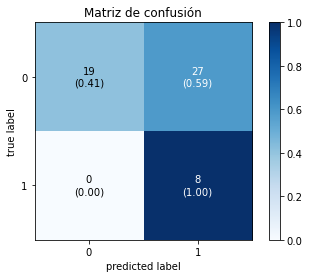

Recall: 0.706522
Accuracy: 0.500000
Precision: 0.614286
F1 score: 0.478354


In [146]:

#X_train, X_test, y_train, y_test = train_test_split(df[['means','Eritemia']], df['Anemia?'], test_size=0.33, random_state=0)
logmodel = LogisticRegression()
logmodel.fit(df_model[df_model['Eritemia'].notna()][['Eritemia','means', 'stdev', 'softness', 'asimetria', 'uniformi', 'entropy']], df_model[df_model['Eritemia'].notna()]['CLASE'])
predictions = logmodel.predict(df_val[['Eritemia', 'means', 'stdev', 'softness', 'asimetria', 'uniformi', 'entropy']])
confusion_matrix(df_val['clase'], predictions)

analisis(df_val['clase'], predictions,"Matriz de confusión")

# recall: tp / (tp + fn)
Recall= recall_score(df_val['clase'], predictions, average='macro')
print('Recall: %f' % Recall)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df_val['clase'], predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df_val['clase'], predictions, average='macro')
print('Precision: %f' % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df_val['clase'], predictions, average='macro')
print('F1 score: %f' % f1)

In [147]:
modelname = 'logisticModel'
pickle.dump(logmodel,open(modelname,'wb'))

In [142]:
os.getcwd()

'C:\\Users\\torej\\Downloads\\FASE1\\FASE1\\VALID2\\VALID2'

In [22]:
np.reshape([1,2],(2,1))

array([[1],
       [2]])

In [31]:
dicnt = {0:'Sin anemia', 1:'Con anemia'}
valia=[0]
dicnt[valia[0]]

'Sin anemia'

In [150]:
np.reshape([1,2,3,4,5,5,6],(-1,1))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [5],
       [6]])